# Explore Weather Trends

## Purpose
This project from Udacity's Data Analyst Nanodegree Program analyzes local and global temperature data and compares the temperature trends in selected cities with overall global temperature trends.

## Dataset
There are three tables in the database provided in the Udacity's workspace:
- `city_list` - This contains a list of cities and countries in the database.
- `city_data` - This contains the average temperatures for each city by year (ºC).
- `global_data` - This contains the average global temperatures by year (ºC).

Data for analysis is extracted using the following SQL query:

```
SELECT  city.year,
        city.city,
        city.avg_temp as city_avg_temp,
        global.avg_temp as glob_avg_temp
FROM city_data city, global_data global
WHERE  city.year = global.year AND
       city in ('Prague', 'Johannesburg', 'New York', 
                'Shanghai', 'Sydney', 'Rio De Janeiro')
```
An advantage of this solution is just one file to work with, a disadvantage is a need to reconstruct the global temperature data as multiple cities are compared.

Data is downloaded from Udacity's workspace and uploaded to GitHub for further processing.

In [1]:
# Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Download data
data_url = 'https://raw.githubusercontent.com/lustraka/Data_Analysis_Workouts/main/Explore_Weather_Trends/temp_data.csv'
data = pd.read_csv(data_url)
print(data.head())

   year      city  city_avg_temp  glob_avg_temp
0  1750    Prague           9.11           8.72
1  1750  New York          10.07           8.72
2  1751  New York          10.79           7.98
3  1751    Prague           9.13           7.98
4  1752  New York           2.81           5.78


In [3]:
# `series` dictionary holds average temperature series for the globe and selected cities
series = {'globe' : data.groupby('year').glob_avg_temp.first()}
for city in data.city.unique():
  series[city] = data.loc[data.city == city, ['year', 'city_avg_temp']].set_index('year').squeeze()

## Visualization

The temperature trends are visualized in line graphs that are most commonly used to plot contiuous data. Because the points are physically connected via the line, it implies a connection between points.

To smooth out the lines and make trends more observable, the chart plots the *moving average* over a decade using `.rolling(10).mean()` method of the Pandas' Series object.

## Prague
The line chart below compares average temperatures in Prague with the global temperatures.



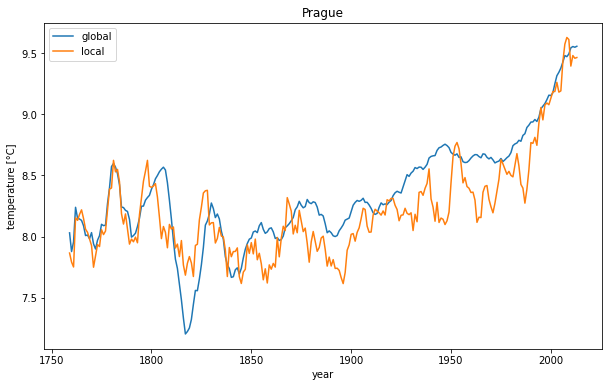

In [4]:
fig, ax = plt.subplots(figsize=(10,6))
ct = data.loc[data.city == 'Prague', ['year', 'city_avg_temp']].set_index('year').squeeze()
ax.plot(series['globe'].rolling(10).mean(), label='global')
ax.plot(series['Prague'].rolling(10).mean(), label='local')
ax.set_title('Prague')
ax.set_xlabel('year')
ax.set_ylabel('temperature [°C]')
ax.legend()
plt.show()

**Observations**:
- The average temperature in Prague has nearly the same level as the global average temperature.
- Also the trend of Prague's temperature is similar to the global temperature trend.
- First 40 years of 19th century was unusually cold.
- From the beginning of 20th century the average temperature is growing and this trend is accelerating in last 40 years.

## Multiple Cities

The line charts below compares average temperatures in Prague, Johannesburg, New York, Shanghai, Sydney, and Rio De Janeiro.

In [5]:
cities = data.city.unique()
cities.shape=(3,2)

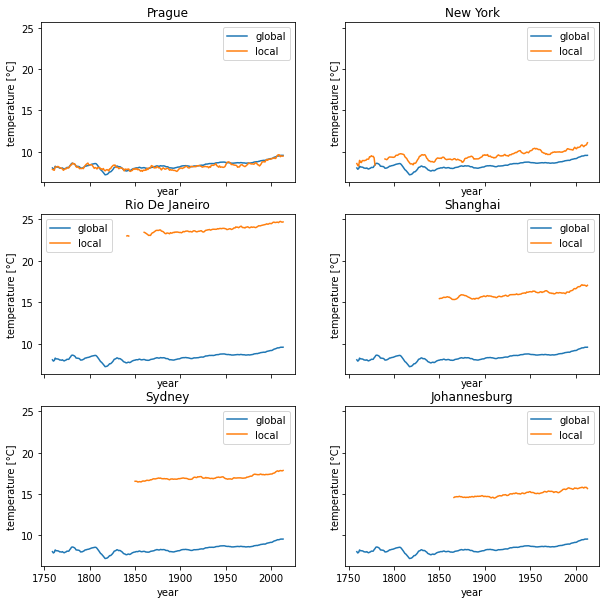

In [6]:
fig, ax = plt.subplots(3, 2, figsize=(10,10), sharex='all', sharey='all')
glob_temp_moving = series['globe'].rolling(10).mean()
for c in [0,1]:
  for r in [0,1,2]:
    ax[r,c].plot(glob_temp_moving, label='global')
    ax[r,c].plot(series[cities[r,c]].rolling(10).mean(), label='local')
    ax[r,c].set_title(cities[r,c])
    ax[r,c].set_xlabel('year')
    ax[r,c].set_ylabel('temperature [°C]')
    ax[r,c].legend()
plt.show()

In [7]:
# `stats` dictionary calculates same basic statistics of the dataset
stats = {}
for k,v in series.items():
  stats[k] = [v.index[0], len(v), v.mean(), series['globe'].corr(v)]
# Statistical data is presented using a dataframe
pd.set_option('max_columns', None) # To print all columns
print(pd.DataFrame(stats, index=['First observation', 'Number of observations', 'Average temperature [°C]', 'Correlation']))

                                globe       Prague     New York  \
First observation         1750.000000  1750.000000  1750.000000   
Number of observations     264.000000   264.000000   264.000000   
Average temperature [°C]     8.359394     8.234924     9.486882   
Correlation                  1.000000     0.517957     0.563413   

                          Rio De Janeiro     Shanghai       Sydney  \
First observation            1832.000000  1841.000000  1841.000000   
Number of observations        182.000000   173.000000   173.000000   
Average temperature [°C]       23.791486    15.973237    17.004220   
Correlation                     0.798931     0.784995     0.754343   

                          Johannesburg  
First observation          1857.000000  
Number of observations      157.000000  
Average temperature [°C]     15.067006  
Correlation                   0.729322  


**Observations**:
- Out of the selected cities, Prague's average temperature (8.23 ­­°C) is the closest to the global average temperature (8.36 °C).
- Prague and New York have the complete set of observations starting in year 1750.
- New York has a little higher average temperature than the globe, followed by Johannesburg, Shanghai, Sydney, and Rio de Janeiro, whose average temperature is 23.79 °C.
- Tempartures in all cities are highly correlated with global temperatures. Correlation of data starting around 1850 is higher, probably due to lesser accuracy of older data.

## References
- [Explainer: How do scientists measure global temperature?](https://www.carbonbrief.org/explainer-how-do-scientists-measure-global-temperature)
- [WEATHER IN HISTORY 1800 TO 1849 AD](https://premium.weatherweb.net/weather-in-history-1800-to-1849-ad/)